# Price Earnings (PER) - ¿Tiene reversión a la media?

Caso de estudio: Banco JP Morgan.

Objetivo: Construir la serie historica del PER y corroborar si tiene reversión a la media.


PER = Precio de Mercado / EPS.

EPS = (Net Income - Preferred Dividends) / Shares Oustanding.

In [1]:
import pandas as pd
import numpy as np
import eikon as ek
import matplotlib.pyplot as plt

API Key

In [2]:
ek.set_app_key('#IngresoApiKey')

Defino el RIC y descargo la información.

In [3]:
ric = "JPM"

In [4]:
data, err = ek.get_data(ric, ["TR.F.OriginalAnnouncementDate(Period=FQ0, Frq=FQ, SDate=0, EDate=-45)",
                                   "TR.BSPeriodEndDate(Period=FQ0, Frq=FQ, SDate=0, EDate=-45)",
                                   "TR.NetIncome(Period=FQ0, Frq=FQ, SDate=0, EDate=-45)",
                                   "TR.SharesOutstandingCommonTotal(Period=FQ0, Frq=FQ, SDate=0, EDate=-45)",
                                   "TR.PreferredDividends(Period=FQ0, Frq=FQ, SDate=0, EDate=-45)"])

In [5]:
data

,Instrument,Original Announcement Date Time,Balance Sheet Period End Date,Net Income Incl Extra Before Distributions,Total Common Shares Outstanding,Preferred Dividends
0,JPM,2020-04-14T10:45:23Z,2020-03-31,2865000000,3047022880,-421000000
1,JPM,2020-01-14T11:47:31Z,2019-12-31,8520000000,3084021330,-386000000
2,JPM,2019-10-15T11:02:34Z,2019-09-30,9080000000,3136484920,-423000000
3,JPM,2019-07-16T10:47:36Z,2019-06-30,9652000000,3197484990,-404000000
4,JPM,2019-04-12T10:48:02Z,2019-03-31,9179000000,3243972970,-374000000
5,JPM,2019-01-15T12:10:16Z,2018-12-31,7066000000,3275766220,-384000000
6,JPM,2018-10-12T10:48:54Z,2018-09-30,8380000000,3325410730,-379000000
7,JPM,2018-07-13T17:00:00Z,2018-06-30,8316000000,3360884110,-379000000
8,JPM,2018-04-13T17:00:00Z,2018-03-31,8712000000,3404776920,-409000000
9,JPM,2018-01-12T16:00:00Z,2017-12-31,4232000000,3425298830,-428000000


Anualizaremos a cada cuarto, los valores del Net Income y Dividendos, ya que son variales flujo.

In [6]:
data['NI_Anual'] = 0
data['Pd_Tot'] = 0 

In [7]:
data

,Instrument,Original Announcement Date Time,Balance Sheet Period End Date,Net Income Incl Extra Before Distributions,Total Common Shares Outstanding,Preferred Dividends,NI_Anual,Pd_Tot
0,JPM,2020-04-14T10:45:23Z,2020-03-31,2865000000,3047022880,-421000000,0,0
1,JPM,2020-01-14T11:47:31Z,2019-12-31,8520000000,3084021330,-386000000,0,0
2,JPM,2019-10-15T11:02:34Z,2019-09-30,9080000000,3136484920,-423000000,0,0
3,JPM,2019-07-16T10:47:36Z,2019-06-30,9652000000,3197484990,-404000000,0,0
4,JPM,2019-04-12T10:48:02Z,2019-03-31,9179000000,3243972970,-374000000,0,0
5,JPM,2019-01-15T12:10:16Z,2018-12-31,7066000000,3275766220,-384000000,0,0
6,JPM,2018-10-12T10:48:54Z,2018-09-30,8380000000,3325410730,-379000000,0,0
7,JPM,2018-07-13T17:00:00Z,2018-06-30,8316000000,3360884110,-379000000,0,0
8,JPM,2018-04-13T17:00:00Z,2018-03-31,8712000000,3404776920,-409000000,0,0
9,JPM,2018-01-12T16:00:00Z,2017-12-31,4232000000,3425298830,-428000000,0,0


In [8]:
for i in range(3,len(data)):
    data.iat[i-3,6] = data.iat[i-3,3] + data.iat[i-2,3] + data.iat[i-1,3] + data.iat[i,3]
    data.iat[i-3,7] = data.iat[i-3,5] + data.iat[i-2,5] + data.iat[i-1,5] + data.iat[i,5]

In [9]:
data

,Instrument,Original Announcement Date Time,Balance Sheet Period End Date,Net Income Incl Extra Before Distributions,Total Common Shares Outstanding,Preferred Dividends,NI_Anual,Pd_Tot
0,JPM,2020-04-14T10:45:23Z,2020-03-31,2865000000,3047022880,-421000000,30117000000,-1634000000
1,JPM,2020-01-14T11:47:31Z,2019-12-31,8520000000,3084021330,-386000000,36431000000,-1587000000
2,JPM,2019-10-15T11:02:34Z,2019-09-30,9080000000,3136484920,-423000000,34977000000,-1585000000
3,JPM,2019-07-16T10:47:36Z,2019-06-30,9652000000,3197484990,-404000000,34277000000,-1541000000
4,JPM,2019-04-12T10:48:02Z,2019-03-31,9179000000,3243972970,-374000000,32941000000,-1516000000
5,JPM,2019-01-15T12:10:16Z,2018-12-31,7066000000,3275766220,-384000000,32474000000,-1551000000
6,JPM,2018-10-12T10:48:54Z,2018-09-30,8380000000,3325410730,-379000000,29640000000,-1595000000
7,JPM,2018-07-13T17:00:00Z,2018-06-30,8316000000,3360884110,-379000000,27992000000,-1628000000
8,JPM,2018-04-13T17:00:00Z,2018-03-31,8712000000,3404776920,-409000000,26705000000,-1660000000
9,JPM,2018-01-12T16:00:00Z,2017-12-31,4232000000,3425298830,-428000000,24441000000,-1663000000


In [10]:
data.drop([43, 44, 45], inplace=True)

In [11]:
data

,Instrument,Original Announcement Date Time,Balance Sheet Period End Date,Net Income Incl Extra Before Distributions,Total Common Shares Outstanding,Preferred Dividends,NI_Anual,Pd_Tot
0,JPM,2020-04-14T10:45:23Z,2020-03-31,2865000000,3047022880,-421000000,30117000000,-1634000000
1,JPM,2020-01-14T11:47:31Z,2019-12-31,8520000000,3084021330,-386000000,36431000000,-1587000000
2,JPM,2019-10-15T11:02:34Z,2019-09-30,9080000000,3136484920,-423000000,34977000000,-1585000000
3,JPM,2019-07-16T10:47:36Z,2019-06-30,9652000000,3197484990,-404000000,34277000000,-1541000000
4,JPM,2019-04-12T10:48:02Z,2019-03-31,9179000000,3243972970,-374000000,32941000000,-1516000000
5,JPM,2019-01-15T12:10:16Z,2018-12-31,7066000000,3275766220,-384000000,32474000000,-1551000000
6,JPM,2018-10-12T10:48:54Z,2018-09-30,8380000000,3325410730,-379000000,29640000000,-1595000000
7,JPM,2018-07-13T17:00:00Z,2018-06-30,8316000000,3360884110,-379000000,27992000000,-1628000000
8,JPM,2018-04-13T17:00:00Z,2018-03-31,8712000000,3404776920,-409000000,26705000000,-1660000000
9,JPM,2018-01-12T16:00:00Z,2017-12-31,4232000000,3425298830,-428000000,24441000000,-1663000000


Creo un dataframe y almaceno el EPS cálculado y la fecha de presentación del balance.

In [12]:
eps = pd.DataFrame()
eps['date'] = data['Original Announcement Date Time']
eps['eps'] = (data['NI_Anual'] + data['Pd_Tot']) / data['Total Common Shares Outstanding']

In [13]:
eps['date'] = pd.to_datetime(eps['date'], format='%Y-%m-%d').dt.date

In [14]:
eps = eps.iloc[::-1]

In [15]:
eps

,date,eps
42,2009-10-14,1.638104
41,2010-01-15,2.356443
40,2010-04-14,2.727051
39,2010-07-15,3.606057
38,2010-10-13,3.864133
37,2011-01-14,4.277939
36,2011-04-13,4.756404
35,2011-07-14,5.013303
34,2011-10-13,5.119929
33,2012-01-13,4.863107


Descargo los precios para el periodo.

In [16]:
price = ek.get_timeseries(ric,fields='CLOSE',start_date='2009-10-14')

In [17]:
price

JPM,CLOSE
Date,
2009-10-14,47.16
2009-10-15,47.16
2009-10-16,46.06
2009-10-19,45.98
2009-10-20,46.03
2009-10-21,44.65
2009-10-22,45.71
2009-10-23,45.23
2009-10-26,43.82


In [18]:
price['eps'] = 0.0
price['date'] = price.index

In [19]:
price

JPM,CLOSE,eps,date
Date,,,
2009-10-14,47.16,0.0,2009-10-14
2009-10-15,47.16,0.0,2009-10-15
2009-10-16,46.06,0.0,2009-10-16
2009-10-19,45.98,0.0,2009-10-19
2009-10-20,46.03,0.0,2009-10-20
2009-10-21,44.65,0.0,2009-10-21
2009-10-22,45.71,0.0,2009-10-22
2009-10-23,45.23,0.0,2009-10-23
2009-10-26,43.82,0.0,2009-10-26


Algoritmo para completar la serie.

In [20]:
for a in range(1,len(eps)):
    for i in range(0,len(price)):
        if price.iat[i,2] >= eps.iat[a-1,0] and price.iat[i,2] < eps.iat[a,0]:            
                price.iat[i,1] = eps.iat[a-1,1]
        elif price.iat[i,2] > eps.iat[a,0]:
                price.iat[i,1] = eps.iat[a,1]
          

In [21]:
price

JPM,CLOSE,eps,date
Date,,,
2009-10-14,47.16,1.638104,2009-10-14
2009-10-15,47.16,1.638104,2009-10-15
2009-10-16,46.06,1.638104,2009-10-16
2009-10-19,45.98,1.638104,2009-10-19
2009-10-20,46.03,1.638104,2009-10-20
2009-10-21,44.65,1.638104,2009-10-21
2009-10-22,45.71,1.638104,2009-10-22
2009-10-23,45.23,1.638104,2009-10-23
2009-10-26,43.82,1.638104,2009-10-26


Cálculo del PER y gráfico.

In [22]:
price['PER'] = price['CLOSE'] / price['eps']

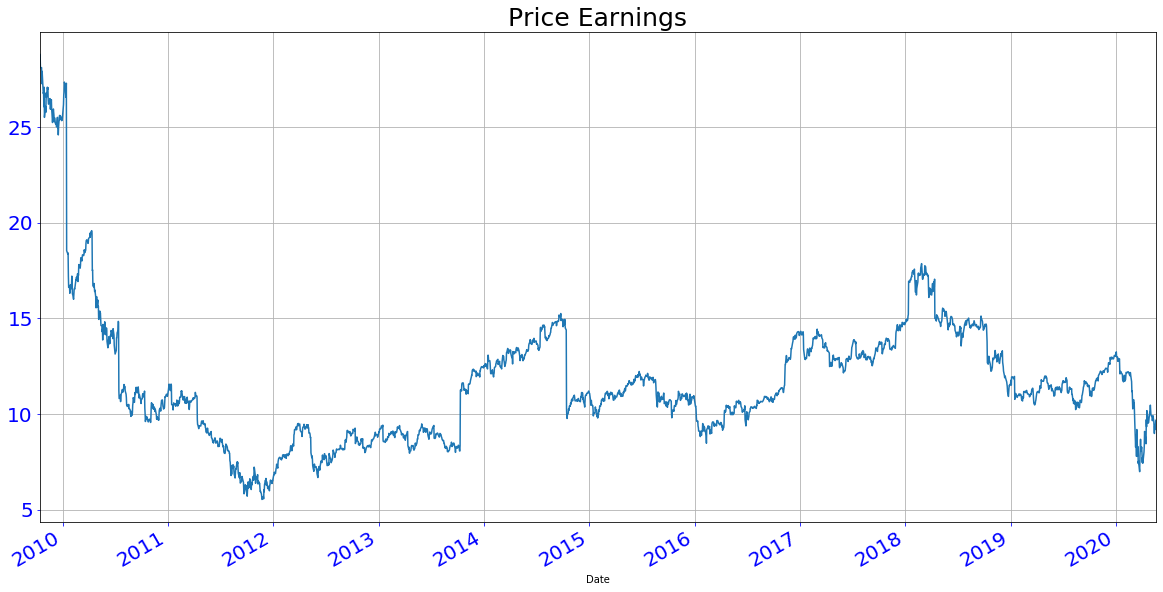

In [23]:
price['PER'].plot(figsize=(20,10), grid=True)
plt.title('Price Earnings',fontsize=25, color='black')
plt.tick_params(axis='both', colors='blue', labelsize=20)

In [24]:
def Bolinger_Bands(stock_price, window_size, num_of_std):

    rolling_mean = stock_price.rolling(window=window_size).mean()
    rolling_std  = stock_price.rolling(window=window_size).std()
    upper_band = rolling_mean + (rolling_std*num_of_std)
    lower_band = rolling_mean - (rolling_std*num_of_std)

    return rolling_mean, upper_band, lower_band


In [25]:
price['rolling_avg_price'], price['upper_band'], price['lower_band'] = Bolinger_Bands(price['PER'], 100, 2)

In [26]:
price.dropna(inplace=True)

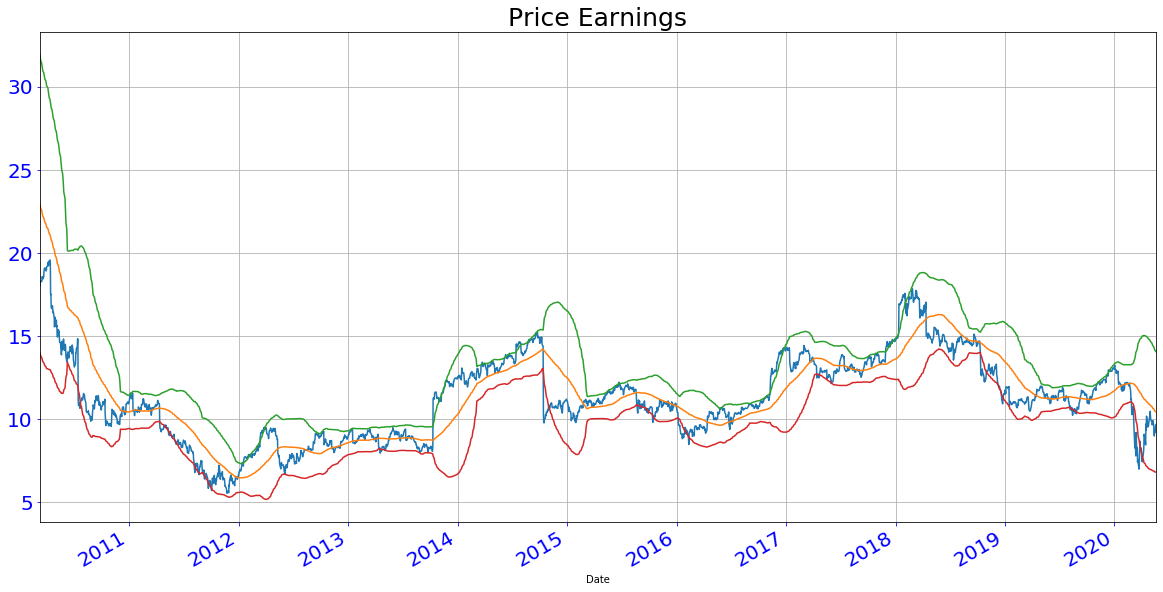

In [27]:
price['PER'].plot(figsize=(20,10), grid=True)
price['rolling_avg_price'].plot(figsize=(20,10), grid=True)
price['upper_band'].plot(figsize=(20,10), grid=True)
price['lower_band'].plot(figsize=(20,10), grid=True)
plt.title('Price Earnings',fontsize=25, color='black')
plt.tick_params(axis='both', colors='blue', labelsize=20)